In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/Shared\ drives/IDS\ 575    

/content/drive/Shared drives/IDS 575


In [ ]:
import pandas as pd
import re
import string
import nltk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import WordNetLemmatizer
import seaborn as sns

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from nltk import FreqDist, word_tokenize
from wordcloud import STOPWORDS

# Make a set of stop words
stopwords = set(STOPWORDS)
more_stopwords = {'https', 'amp','û'}
stopwords = stopwords.union(more_stopwords)

#stopwords = nltk.corpus.stopwords.words('english')
word_lemmenatization = nltk.stem.WordNetLemmatizer()
ps = nltk.PorterStemmer()

font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


In [ ]:
#Loading data
dataset = pd.read_csv('DFE.csv')
dataset = dataset[['choose_one','keyword','location','text']]
dataset['target'] = dataset.choose_one.apply(lambda x: 1 if x == "Relevant" else 0)
dataset = dataset[['keyword','location','text','target']]

In [ ]:
dataset.head(100)

,keyword,location,text,target
0,NaN,NaN,Just happened a terrible car crash,1
1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",1
3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
...,...,...,...,...
95,ablaze,San Francisco,@ablaze what time does your talk go until? I don't know if I can make it due to work.,0
96,accident,CLVLND,'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER,0
97,accident,"Nashville, TN",Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693EgJ,1
98,accident,"Santa Clara, CA",Accident center lane blocked in #SantaClara on US-101 NB before Great America Pkwy #BayArea #Traffic http://t.co/pmlOhZuRWR,1


Text(0.5, 1.0, 'Count of Real & Not Tweets')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


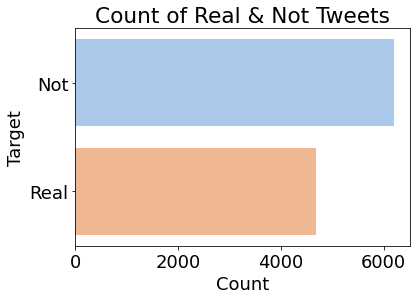

In [ ]:
target_counts = pd.DataFrame({"Target":["Not","Real"],"Count":dataset['target'].value_counts()})
sns.barplot(y="Target",x="Count",data=target_counts,palette="pastel").set_title("Count of Real & Not Tweets")

In [ ]:
counts = pd.DataFrame({"Target":["Not","Real"],"Count":ytr.value_counts()})

In [ ]:
counts

,Target,Count
0,Not,4362
1,Real,3251


In [ ]:
#creating meta features
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 4)*100

def meta_features(data):
    data1 = pd.DataFrame()
    data1['tweet_length'] = data['text'].apply(lambda x: len(x) - x.count(" ")) #tweet length without space
    data1['% punctuation'] = data['text'].apply(lambda x: count_punct(x)) #percantege of punctuation
    data1["words_count"] = data["text"].apply(lambda x: len(str(x).split())) #number of words
    data1["unique_words_count"] = data["text"].apply(lambda x: len(set(str(x).split()))) ## Number of unique words in the text ##
    ## Number of stopwords in the text ##
    data1["stopwords_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    ## Number of upper case words in the text ##
    data1["words_uppercase_count"] = data["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    ## Number of title case words in the text ##
    data1["words_titlecase_count"] = data["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    ## Average length of the words in the text ##
    data1["mean_word_length"] = data["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    #number of hastags in tweet
    data1["hashtags_count"]=data["text"].apply(lambda x : len([match.group(0)[1:] for match in re.finditer(r"#(\w+)", x)]))
    #number of mentions in tweet
    data1["mentions_count"]=data["text"].apply(lambda x : len([match.group(0)[1:] for match in re.finditer(r"@\w+", x)]))
    #number of links in tweet
    data1["links_count"]=data["text"].apply(lambda x : len([match.group(0)[:] for match in re.finditer(r"https?://\S+", x)]))
    #data1['target']=data['target']
    return data1

In [ ]:
meta_eda = meta_features(dataset)
#meta_eda = meta_eda.drop(["words_titlecase_count","words_uppercase_count","hashtags_count","mentions_count","links_count"],axis=1)

In [ ]:
mxtr,mxte,ytr,yte = train_test_split(meta_eda,dataset['target'],test_size=0.3,train_size=0.7,random_state=333)

In [ ]:
mxtr

,tweet_length,% punctuation,words_count,unique_words_count,stopwords_count,words_uppercase_count,words_titlecase_count,mean_word_length,hashtags_count,mentions_count,links_count
8598,81,8.64,12,12,3,6,0,6.750000,0,0,1
8220,73,15.07,14,14,4,2,1,5.214286,0,4,0
5916,73,2.74,16,16,6,16,1,4.500000,1,0,0
5979,93,6.45,19,19,8,0,2,4.894737,0,1,0
4626,71,8.45,12,12,4,0,1,5.916667,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7534,80,7.50,12,12,3,0,1,6.666667,1,0,1
6067,82,9.76,13,13,1,0,1,6.307692,0,1,1
9635,85,9.41,13,13,1,4,4,6.538462,0,0,1
973,48,8.33,7,7,2,1,1,6.571429,0,2,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
log = LogisticRegression()
scaler = StandardScaler()
svm = SVC()
sgd = SGDClassifier()
dxtree = DecisionTreeClassifier()
mnb = MultinomialNB()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = scaler.fit_transform(mxtr)
test_scaled = scaler.fit_transform(mxte)

In [ ]:
log.fit(scaled,ytr)
svm.fit(scaled,ytr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
dxtree.fit(scaled,ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
mnb.fit(mxtr,ytr)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(mxte,yte)

0.6218204106650321

In [ ]:
log.score(test_scaled,yte)

In [ ]:
svm.score(test_scaled,yte)

0.6834201654918787

In [ ]:
sgd.score(test_scaled,yte)

0.6346920012258658

In [ ]:
dxtree.score(test_scaled,yte)

0.614158749616917

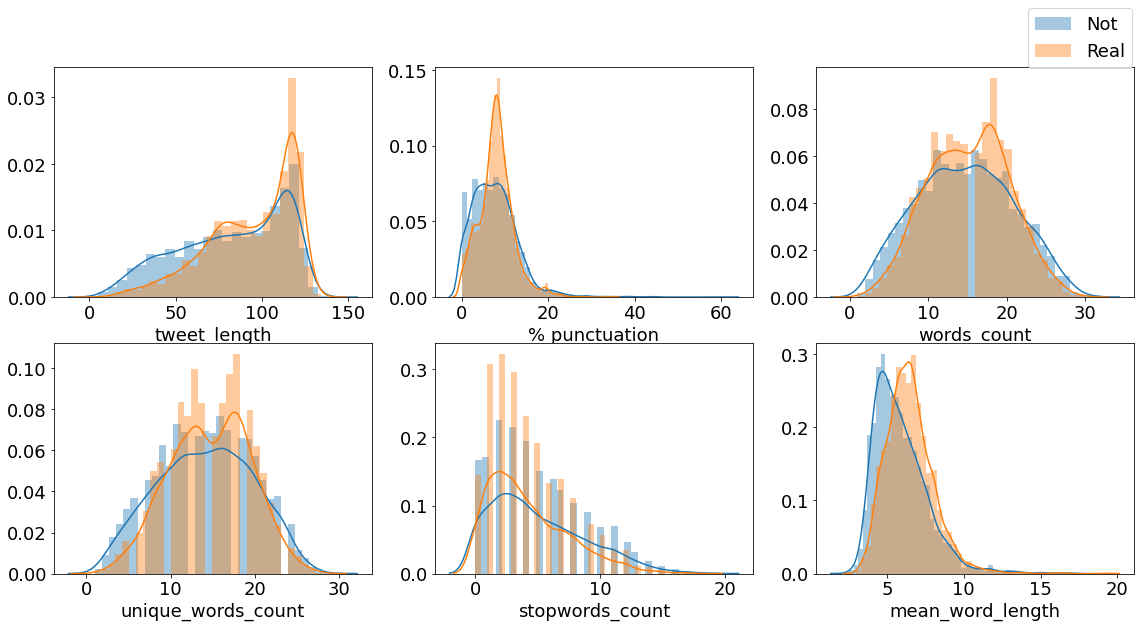

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(8,8))
fig.subplots_adjust(bottom=0.000012,right=2)

sns.distplot(meta_eda[meta_eda['target'] == 0]['tweet_length'],label="Not",ax=ax[0][0])
sns.distplot(meta_eda[meta_eda['target'] == 1]['tweet_length'],label="Real",ax=ax[0][0])

sns.distplot(meta_eda[meta_eda['target'] == 0]['% punctuation'],ax=ax[0][1])
sns.distplot(meta_eda[meta_eda['target'] == 1]['% punctuation'],ax=ax[0][1])

sns.distplot(meta_eda[meta_eda['target'] == 0]['words_count'],ax=ax[0][2])
sns.distplot(meta_eda[meta_eda['target'] == 1]['words_count'],ax=ax[0][2])

sns.distplot(meta_eda[meta_eda['target'] == 0]['unique_words_count'],ax=ax[1][0])
sns.distplot(meta_eda[meta_eda['target'] == 1]['unique_words_count'],ax=ax[1][0])

sns.distplot(meta_eda[meta_eda['target'] == 0]['stopwords_count'],ax=ax[1][1])
sns.distplot(meta_eda[meta_eda['target'] == 1]['stopwords_count'],ax=ax[1][1])

#sns.distplot(meta_eda[meta_eda['target'] == 0]['words_uppercase_count'],ax=ax[1][2])
#sns.distplot(meta_eda[meta_eda['target'] == 1]['words_uppercase_count'],ax=ax[1][2])

#sns.distplot(meta_eda[meta_eda['target'] == 0]['words_titlecase_count'],ax=ax[2][0])
#sns.distplot(meta_eda[meta_eda['target'] == 1]['words_titlecase_count'],ax=ax[2][0])

sns.distplot(meta_eda[meta_eda['target'] == 0]['mean_word_length'],ax=ax[1][2])
sns.distplot(meta_eda[meta_eda['target'] == 1]['mean_word_length'],ax=ax[1][2])

#sns.distplot(meta_eda[meta_eda['target'] == 0]['hashtags_count'],ax=ax[2][2])
#sns.distplot(meta_eda[meta_eda['target'] == 1]['hashtags_count'],ax=ax[2][2])

#sns.distplot(meta_eda[meta_eda['target'] == 0]['mentions_count'],ax=ax[3][0])
#sns.distplot(meta_eda[meta_eda['target'] == 1]['mentions_count'],ax=ax[3][0])

#sns.distplot(meta_eda[meta_eda['target'] == 0]['links_count'],ax=ax[3][1])
#sns.distplot(meta_eda[meta_eda['target'] == 1]['links_count'],ax=ax[3][1])

fig.legend();

In [ ]:
#Slang/Abbrevated word Extraction

# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    'msg':'Message',
    'rip':'Rest in peace',
    'u.s':'United States'
}

#Converts text like "OMG" into "Oh my God"
def unslang(text):
    tokens = []
    for i in text.lower().split():
        if i in abbreviations.keys():
            tokens.append(abbreviations[i].lower())
        else:
            tokens.append(i.lower())
    text = ' '.join([word.lower() for word in tokens])
    return text

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text

# https://stackoverflow.com/a/47091490  """Convert contractions like "can't" into "can not"
def decontracted(phrase):
    """Convert contractions like "can't" into "can not"
    """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_html_tags(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

# replace multiple spaces with one.and lemmatize it after removing stopwords
def clean_text(text):
    
    text = re.sub('\s{2,}', ' ', text)
    tokens = re.split('\W+', text)
    #tokens = [word_lemmenatization.lemmatize(word,pos="v") for word in tokens] #if word not in stopwords]
    text = ' '.join([word.lower() for word in tokens])
    return text

In [ ]:
def process_text(df):
    df1=df
    df1['clean_text']=df['text'].apply(lambda x : strip_links(x))
    df1['clean_text']=df['clean_text'].apply(lambda x : remove_html_tags(x))
    df1['clean_text']=df['clean_text'].apply(lambda x : unslang(x))
    df1['clean_text']=df['clean_text'].apply(lambda x : decontracted(x))
    df1['clean_text']=df['clean_text'].apply(lambda x: remove_emoji(x))
    df1['clean_text']=df['clean_text'].apply(lambda x : remove_punct(x))
    df1['clean_text'] = df['clean_text'].apply(lambda x: clean_text(x))
    df1 = df.drop(['keyword','location'],axis=1)
    return df1

In [ ]:
nltk.download('wordnet')
cleaned_data = process_text(dataset)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

def get_top_tweet_ngrams(corpus, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

def corpus(target):
    return dataset[dataset['target']==target]['clean_text']

def plot_bar(n,ngram):
    fig,ax = plt.subplots(1,2,figsize=(3,10))
    fig.subplots_adjust(bottom=0.000012,right=10)
    x1,y1=map(list,zip(*get_top_tweet_ngrams(corpus(1),n)[:10]))
    x2,y2=map(list,zip(*get_top_tweet_ngrams(corpus(0),n)[:10]))
    sns.barplot(x=y1,y=x1,ax=ax[0]).set_title("Top 10 "+str(ngram)+" in Real")
    sns.barplot(x=y2,y=x2,ax=ax[1]).set_title("Top 10 "+str(ngram)+" in Not Real")

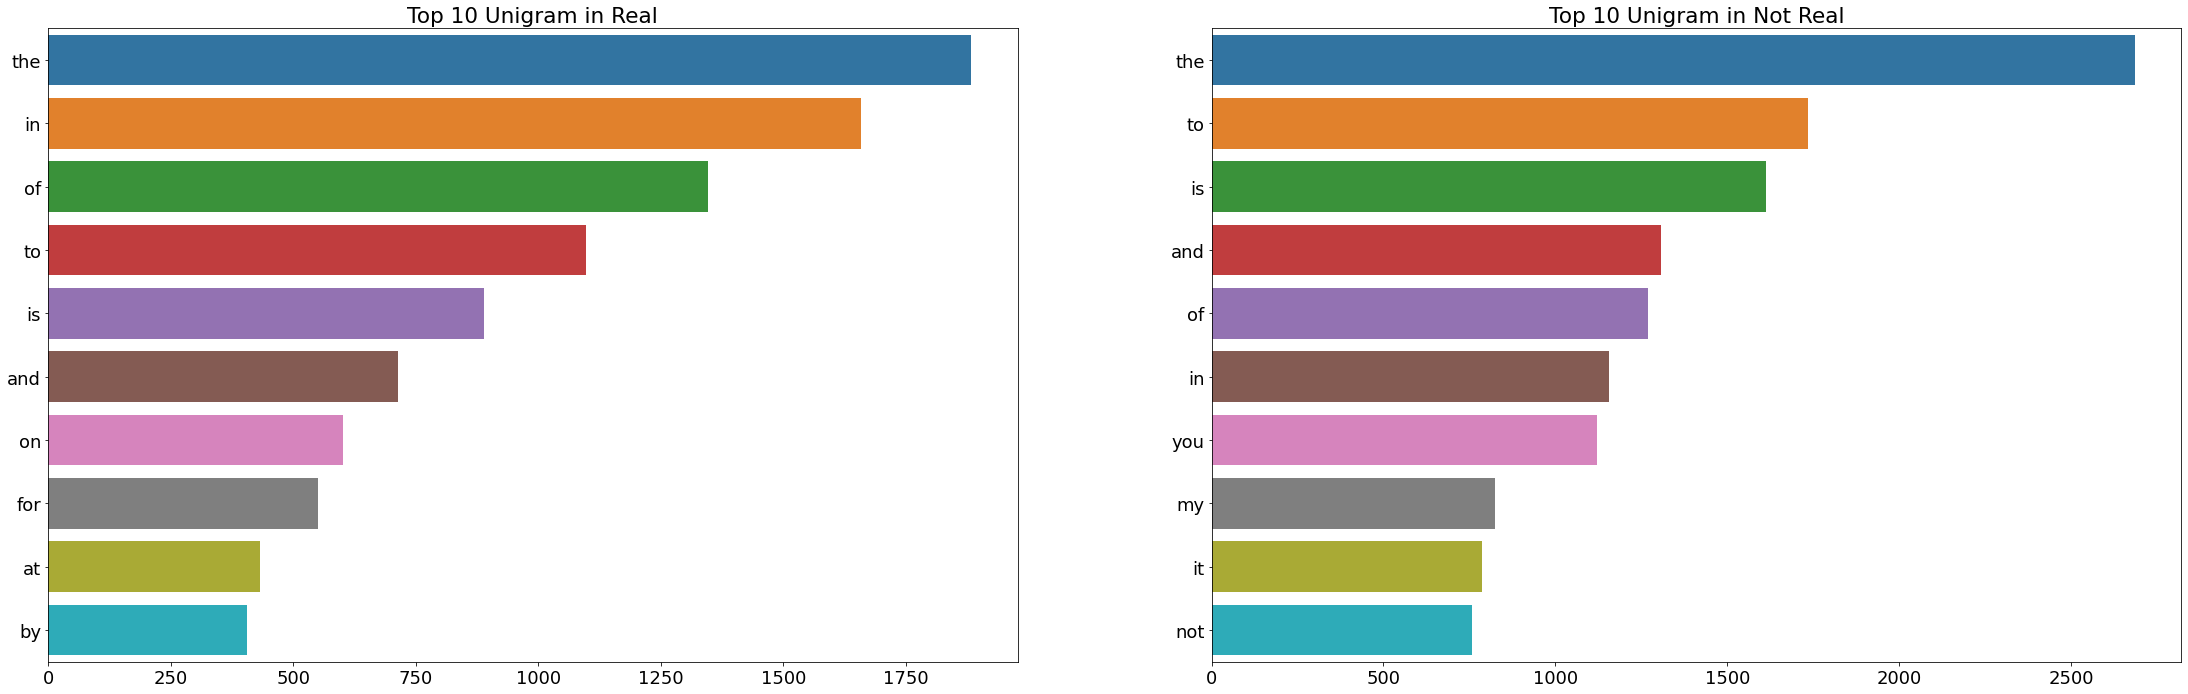

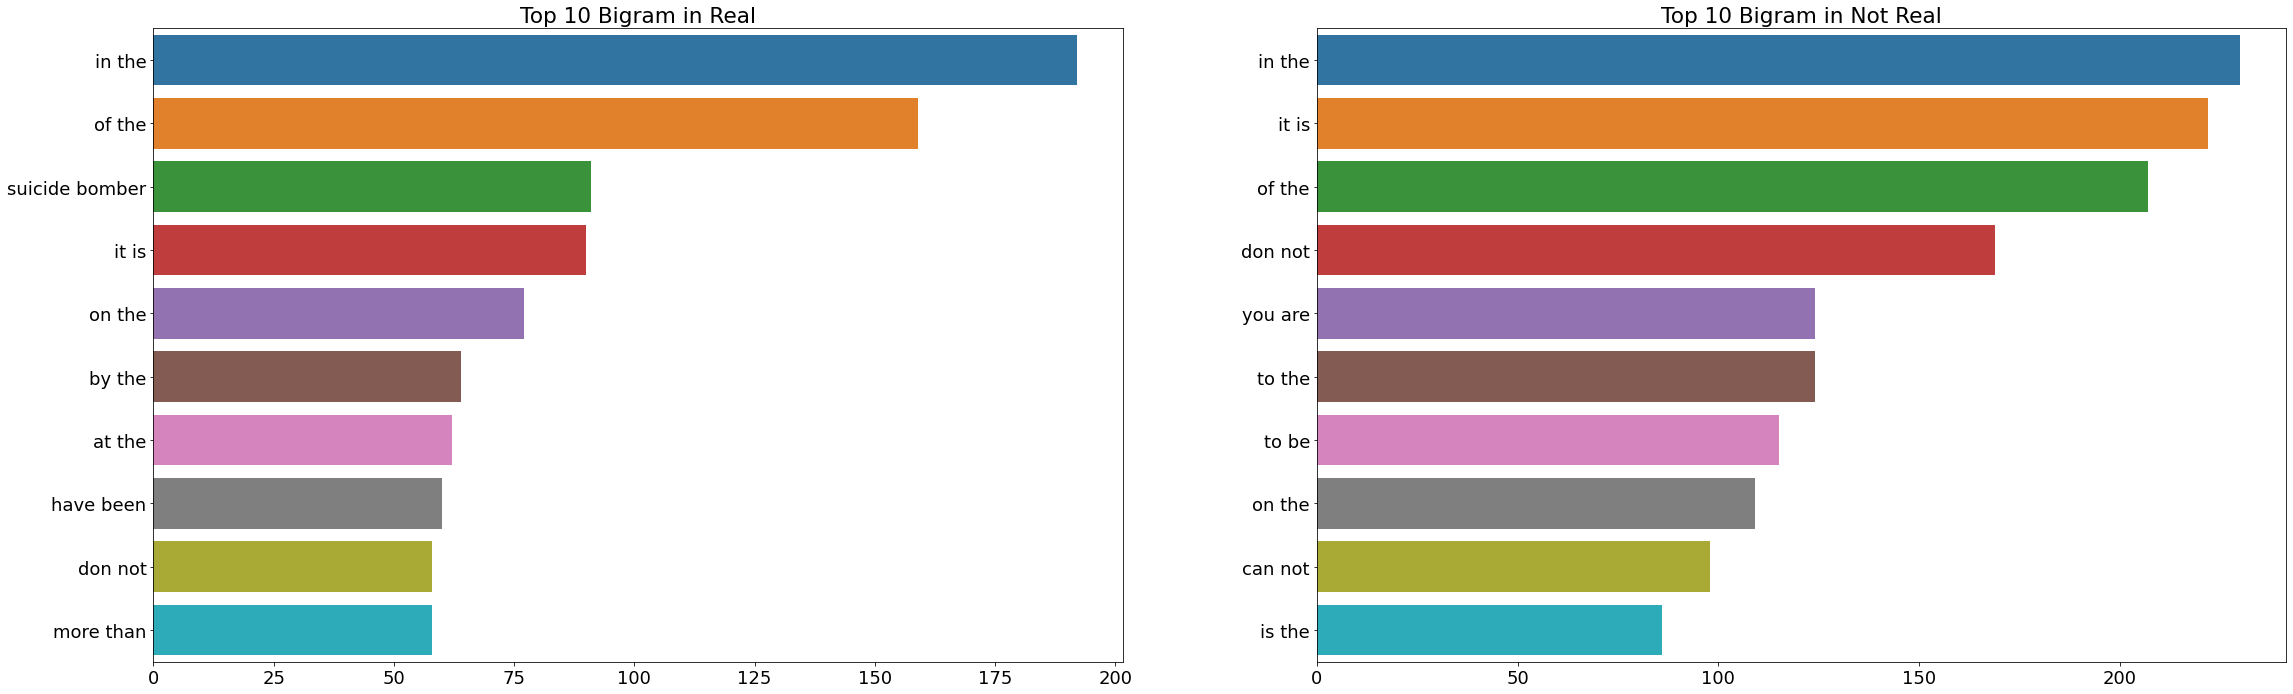

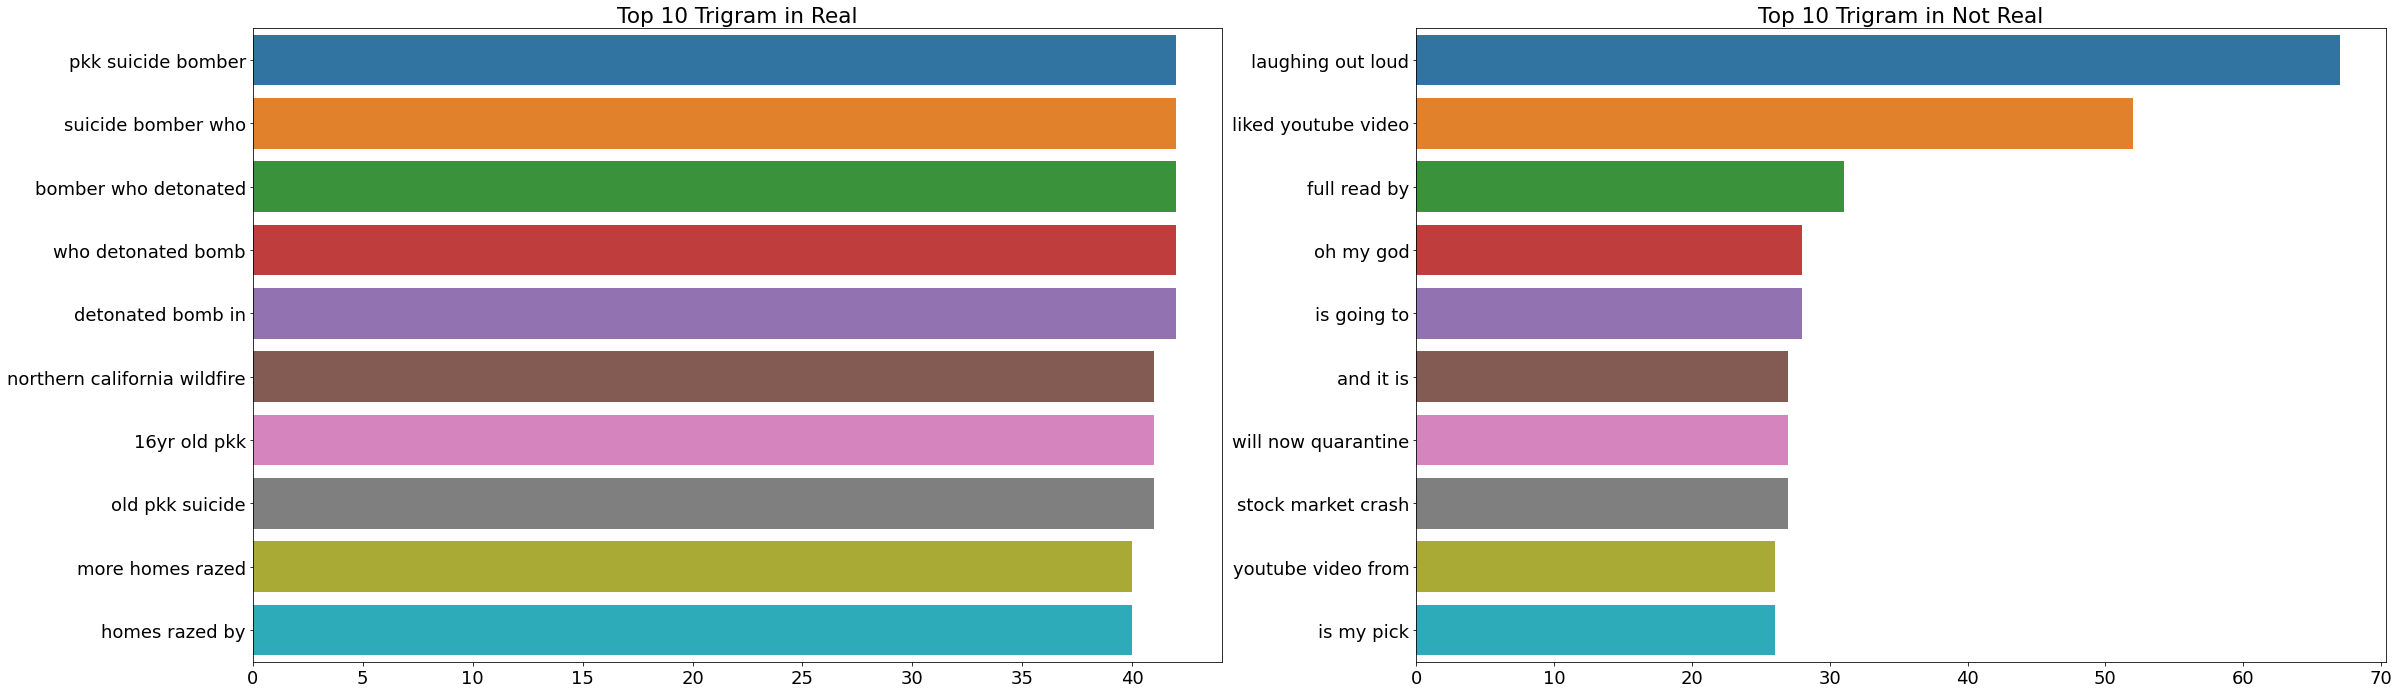

In [ ]:
plot_bar(1,"Unigram")
plot_bar(2,"Bigram")
plot_bar(3,"Trigram")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,accuracy_score, make_scorer,recall_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree,decomposition
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time


scoring = {'accuracy':make_scorer(accuracy_score), 'f1_score':make_scorer(f1_score)}#,'precision': 'precision_macro','recall': make_scorer(recall_score, average='macro')}
scaler = StandardScaler()
train,test = train_test_split(cleaned_data,test_size=0.3,train_size=0.7,random_state=333)

ytrain = train["target"]
ytest = test["target"]

pca = TruncatedSVD(98)

def make_pipeline(clf):
  pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    #('pca', pca),
    #('scl',StandardScaler(with_mean=False)),
    ('clf', clf),
  ])
  return pipeline

n_components = [range(1,50,1)]
    # Create a list of values of the regularization parameter

vect_parameters = {
      #'vect__stop_words':('english',None),
      'vect__ngram_range': ((1, 1), (1, 2),(1,3))} 

      #  'vect__max_features': (None, 5000, 10000, 50000),
      #'vect__binary':(True,False)}
      #'tfidf__use_idf': (True),
      #'vect__min_df': (np.arange(0,0.1,0.01)),
      #'tfidf__norm': ('l2')}


In [ ]:
def grid__search(pipeline,clf,parameters):

  if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,scoring=scoring,return_train_score=True,refit='f1_score')

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train.clean_text, train.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    idx=list(np.where(grid_search.cv_results_['rank_test_f1_score']==1)[0])

    print("Best train accuracy: %0.3f" % grid_search.cv_results_['mean_train_accuracy'][idx[0]])
    print("Best test accuracy: %0.3f" % grid_search.cv_results_['mean_test_accuracy'][idx[0]])
    print("Best f1 score: %0.3f" % grid_search.cv_results_['mean_test_f1_score'][idx[0]])
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    return grid_search.cv_results_

def plot_cv(results,param,scoring):
  plt.figure(figsize=(13, 13))
  plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)
  plt.xlabel(param)
  plt.ylabel("Score")
  ax = plt.gca()
  ax.set_xlim(0,0.03)
  ax.set_ylim(0.5, 1)
  
  # Get the regular numpy array from the MaskedArray
  X_axis = np.array(results[param].data, dtype=float)

  for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    #best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    #best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    #ax.plot([X_axis[best_index], ] * 2, [0, best_score],
     #       linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    #ax.annotate("%0.2f" % best_score,
     #           (X_axis[best_index], best_score + 0.005))
    
  plt.legend(loc="best")
  plt.grid(False)
  plt.show()

In [ ]:
base_logistic = LogisticRegression(random_state=666,n_jobs=-1)
svm = SVC()
dtree = tree.DecisionTreeClassifier()
nb = MultinomialNB()
sgd = SGDClassifier(alpha=0.000001,max_iter=3000)

In [ ]:
logit_results = grid__search(make_pipeline(base_logistic),base_logistic,vect_parameters)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.3s finished


done in 12.594s

Best train accuracy: 0.886
Best test accuracy: 0.804
Best f1 score: 0.746
Best parameters set:
	vect__ngram_range: (1, 1)


In [ ]:
logit_results['mean_test_f1_score']

array([0.74574051, 0.73302605, 0.72428645])

In [ ]:
sgd_results = grid__search(make_pipeline(sgd),sgd,vect_parameters)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.1s finished


done in 7.797s

Best train accuracy: 0.987
Best test accuracy: 0.786
Best f1 score: 0.743
Best parameters set:
	vect__ngram_range: (1, 3)


In [ ]:
nb_results = grid__search(make_pipeline(nb),nb,vect_parameters)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


done in 8.152s

Best train accuracy: 0.884
Best test accuracy: 0.794
Best f1 score: 0.720
Best parameters set:
	vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.0s finished


In [ ]:
svm_results = grid__search(make_pipeline(svm),svm,vect_parameters)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


done in 201.453s

Best train accuracy: 0.966
Best test accuracy: 0.802
Best f1 score: 0.738
Best parameters set:
	vect__ngram_range: (1, 1)


dtree_results = grid__search(make_pipeline(dtree),dtree,vect_parameters)

```
# This is formatted as code
```



In [ ]:
dtree_results = grid__search(make_pipeline(dtree),dtree,vect_parameters)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   54.9s finished


done in 57.294s

Best train accuracy: 0.989
Best test accuracy: 0.719
Best f1 score: 0.668
Best parameters set:
	vect__ngram_range: (1, 1)


In [ ]:
comp = pd.DataFrame({'N-gram':['Unigram','Bigram','Trigram'],'Logistic_regression(base)': logit_results['mean_test_f1_score'],
    'SVM': svm_results['mean_test_f1_score'],
    'Decision Tree': dtree_results['mean_test_f1_score'],
    'Naive Bayes': nb_results['mean_test_f1_score']})

In [ ]:
df = pd.melt(comp,id_vars="N-gram", var_name="Model", value_name="F1_score")

In [ ]:
df

,N-gram,Model,F1_score
0,Unigram,Logistic_regression(base),0.745741
1,Bigram,Logistic_regression(base),0.733026
2,Trigram,Logistic_regression(base),0.724286
3,Unigram,SVM,0.737567
4,Bigram,SVM,0.725085
5,Trigram,SVM,0.715509
6,Unigram,Decision Tree,0.668034
7,Bigram,Decision Tree,0.649403
8,Trigram,Decision Tree,0.638640
9,Unigram,Naive Bayes,0.719981


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


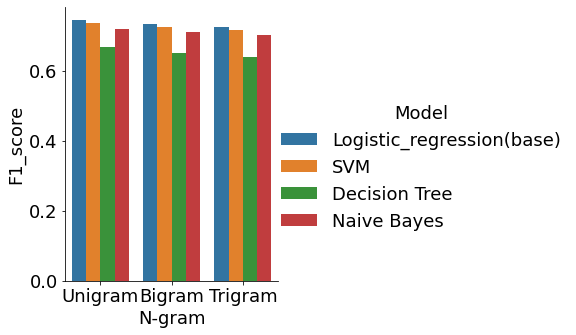

In [ ]:
sns.factorplot(x='N-gram', y='F1_score', hue='Model', data=df, kind='bar')

In [ ]:
def new_pipeline(clf):
  pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=0.03,binary=False,min_df=0,ngram_range=(1,2),stop_words='english')),
    ('tfidf', TfidfTransformer(norm = 'l2',use_idf=True)),
    #('pca', pca),
    #('scl',StandardScaler(with_mean=False)),
    ('clf', clf),
  ])
  return pipeline

logit_para = {'clf__C':np.logspace(0,4,10)}
    #'clf__max_iter': (20,),
    #'clf__alpha': (0.00001, 0.000001),
    #'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
    #'pca__n_components':(range(1,100,1))}
    #'clf__C':C,}
    #'clf__penalty':penalty}

In [ ]:
new_logit = LogisticRegression(n_jobs=-1)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,max_iter=300)
kmean_results = grid__search(make_pipeline(kmeans),kmeans,vect_parameters)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.3min finished


done in 247.224s

Best train accuracy: 0.497
Best test accuracy: 0.476
Best f1 score: 0.366
Best parameters set:
	vect__ngram_range: (1, 2)


In [ ]:
km = make_pipeline(kmeans).fit_transform(train.clean_text,ytrain)

In [ ]:
km.score()

In [ ]:
new_logit_results = grid__search(new_pipeline(new_logit),new_logit,logit_para)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.2s finished


done in 36.079s

Best train accuracy: 0.985
Best test accuracy: 0.798
Best f1 score: 0.754
Best parameters set:
	clf__C: 7.742636826811269


In [ ]:
tuned_logit = LogisticRegression(C = 7.742636826811269,n_jobs=-1)

In [ ]:
cv_logit = cross_validate(new_pipeline(tuned_logit),train.clean_text,ytrain,cv=10,scoring=scoring,n_jobs=-1,return_train_score=True)

In [ ]:
print("Mean test accuracy across 10 folds: %0.3f" %cv_logit['test_accuracy'].mean())
print("Mean test f1 score across 10 folds: %0.3f" %cv_logit['test_f1_score'].mean())

Mean test accuracy across 10 folds: 0.804
Mean test f1 score across 10 folds: 0.761


In [ ]:
count = CountVectorizer(stop_words='english')
count.fit_transform(train.clean_text)

test_pipeline = Pipeline([('tfidif',TfidfVectorizer(binary=False,min_df=0,ngram_range=(1,2),stop_words='english',vocabulary=count.vocabulary_)),
                               ('clf',tuned_logit)])
full_data = test_pipeline.fit(train.clean_text,ytrain)

In [ ]:
full_data = new_pipeline(tuned_logit).fit(train.clean_text,ytrain)

In [ ]:
full_data.score(test.clean_text,ytest)

0.7922157523751149

In [ ]:
prediction = full_data.predict(test.clean_text)

In [ ]:
f1_score(prediction,ytest)

0.7498154981549816

In [ ]:
def comp_plot(metric):
  plot_table = pd.DataFrame({
    'K-folds': list(range(1,11)), 
    'Logistic_regression(base)': logit_cv[metric],
    'SVM': svm_cv[metric],
    'Decision Tree': dtree_cv[metric],
    'Naive Bayes': nb_cv[metric]})
  plt.figure(figsize=(10,5))
  sns.lineplot(x='K-folds', y='value', hue='variable', 
             data=pd.melt(plot_table, ['K-folds'])).set_ylabel(metric)
  plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

In [ ]:
comp_plot('test_accuracy')
comp_plot('test_precision')
comp_plot('test_recall')
comp_plot('test_f1_score')

In [ ]:
def score_comp(metric):
  score_table = pd.DataFrame({ 
    'Logistic_regression(base)': logit_cv[metric].mean(),
    'SVM': svm_cv[metric].mean(),
    'Decision Tree': dtree_cv[metric].mean(),
    'Naive Bayes': nb_cv[metric].mean()},index=["mean_"+metric])
  return score_table

In [ ]:
base_table = pd.concat([score_comp('fit_time'),
                        score_comp('score_time'),
                        score_comp('test_accuracy')*100,
                        score_comp('test_precision'),
                        score_comp('test_recall'),
                        score_comp('test_f1_score')]).round(4)
base_table.transpose()

In [ ]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
#render_mpl_table(base, header_columns=0, col_width=2.0)

In [ ]:
svm_parameteres = {'C':[0.001,0.1,10,100], 'gamma':[0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid=svm_parameteres, cv=5)
svm_grid.fit(cv_xtrain,ytrain)

In [ ]:
tuned_svm = svm_grid.best_estimator_
tuned_svm_cv = cross_validate(tuned_svm,tf_xtrain,ytrain,cv=10,scoring=scoring)

In [ ]:
tuned_svm_cv

In [ ]:
logit_parameters = {'penalty':['l2'],'C':np.logspace(0,4,10)}
logit_grid = GridSearchCV(base_logistic, param_grid=logit_parameters, cv=5)
logit_grid.fit(cv_xtrain,ytrain)

In [ ]:
tuned_logit = logit_grid.best_estimator_
tuned_logit_cv = cross_validate(tuned_logit,cv_xtrain,ytrain,cv=10,scoring=scoring)

In [ ]:
tuned_logit_cv['test_accuracy'].mean()